In [1]:
#Dependencies
import pandas as pd
import numpy as np
from citipy import citipy as cp
import requests
from config import weather_api_key

In [2]:
#Generating 1500 random latitude:longitude keypairs
lats = np.random.uniform(-90, 89, size=1500)
longs = np.random.uniform(-90, 89, size=1500)
lat_lngs = zip(lats, longs)

In [3]:
#Creating a big list of cities
coordinates = list(lat_lngs)
cities = []

for coord in coordinates:
    city = cp.nearest_city(coord[0], coord[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
len(cities)

603

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b314b3c7f113a90ed38264129da92944


In [5]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b314b3c7f113a90ed38264129da92944&q=Boston


In [6]:
weather_df = pd.DataFrame()

get_test = requests.get(city_url)
get_test

<Response [200]>

In [7]:
get_test.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 56.52,
  'feels_like': 56.05,
  'temp_min': 54.28,
  'temp_max': 59.13,
  'pressure': 1010,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 287, 'gust': 0},
 'clouds': {'all': 100},
 'dt': 1654220206,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654160985,
  'sunset': 1654215304},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 56.52,
  'feels_like': 56.05,
  'temp_min': 54.28,
  'temp_max': 59.13,
  'pressure': 1010,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 287, 'gust': 0},
 'clouds': {'all': 100},
 'dt': 1654220206,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654160985,
  'sunset': 1654215304},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
boston_data = city_weather.json()

In [10]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1654160985,
 'sunset': 1654215304}

In [11]:
from datetime import datetime

#Initializing series that we'll use in our dataframe later
city_names = []
country_codes = []
city_times = []
city_lat = []
city_long = []
city_maxtemp = []
city_humidity = []
city_cloudiness = []
city_windspd = []


for city in cities:
    #Iterating through cities and posting a get req
    city_url = url + "&q=" + city
    city_return = requests.get(city_url)
    
    if city_return.status_code == 200:
        
        #Getting a json var to reference later
        city_json = city_return.json()
        
        #Outputting date + time to series
        timestamp = city_json["dt"]
        read_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        city_times.append(read_time)
        
        #Outputting city name to series
        city_names.append(city)
        
        #Outputting country code to series
        country_codes.append(city_json["sys"]["country"])
        
        #Outputting lat and long to series
        city_lat.append(city_json["coord"]["lat"])
        city_long.append(city_json["coord"]["lon"])
        
        #Outputting max temperature to series
        city_maxtemp.append(city_json["main"]["temp_max"])
        
        #Outputting humidity to series
        city_humidity.append(city_json["main"]["humidity"])
        
        #Outputting cloudiness to series
        city_cloudiness.append(city_json["clouds"]["all"])

        #Outputting wind speed to series
        city_windspd.append(city_json["wind"]["speed"])
        
    else: 
        print(city + " removed due to bad response code.")
        cities.remove(city)
        
cities_df = pd.DataFrame()

cities_df["Name"] = city_names
cities_df["Country"] = country_codes
cities_df["Date"] = city_times
cities_df["Lat"] = city_lat
cities_df["Lng"] = city_long
cities_df["Max Temp"] = city_maxtemp
cities_df["Humidity"] = city_humidity
cities_df["Cloudiness"] = city_cloudiness
cities_df["Wind Speed"] = city_windspd

cities_df

barbar removed due to bad response code.
taolanaro removed due to bad response code.
tsihombe removed due to bad response code.
illoqqortoormiut removed due to bad response code.
belushya guba removed due to bad response code.
amderma removed due to bad response code.
dianopolis removed due to bad response code.
barentsburg removed due to bad response code.
warqla removed due to bad response code.
marcona removed due to bad response code.
bolshoy tsaryn removed due to bad response code.
wahran removed due to bad response code.
kuche removed due to bad response code.
sorvag removed due to bad response code.
gilgil removed due to bad response code.
jiddah removed due to bad response code.
toliary removed due to bad response code.
ambodifototra removed due to bad response code.
karaul removed due to bad response code.
duz removed due to bad response code.
cumaribo removed due to bad response code.
grand river south east removed due to bad response code.
attawapiskat removed due to bad res

,Name,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,aguimes,ES,2022-06-03 01:36:01,27.9054,-15.4461,66.83,68,40,15.01
1,berlevag,NO,2022-06-03 01:34:37,70.8578,29.0864,44.40,87,100,24.16
2,hermanus,ZA,2022-06-03 01:34:00,-34.4187,19.2345,44.80,70,0,5.48
3,jamestown,US,2022-06-03 01:40:31,42.0970,-79.2353,58.59,94,0,4.61
4,palmas,BR,2022-06-03 01:42:59,-10.2128,-48.3603,75.07,78,0,6.91
...,...,...,...,...,...,...,...,...,...
493,neunkirchen,DE,2022-06-03 01:46:27,49.3500,7.1833,56.25,59,0,11.50
494,cahors,FR,2022-06-03 01:46:28,44.4167,1.3333,59.70,81,100,5.95
495,ghazipur,IN,2022-06-03 01:46:28,25.5833,83.5667,99.00,18,0,5.99
496,la rioja,ES,2022-06-03 01:39:40,42.2500,-2.5000,60.58,49,100,2.42


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
cities_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = cities_df["Lat"]
max_temps = cities_df["Max Temp"]
humidity = cities_df["Humidity"]
cloudiness = cities_df["Cloudiness"]
wind_speed = cities_df["Wind Speed"]

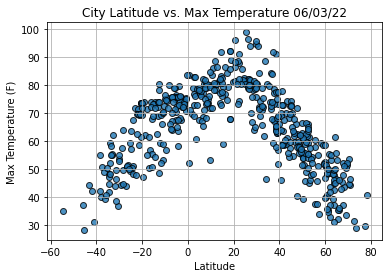

In [30]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

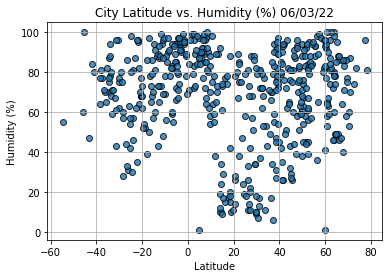

In [31]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

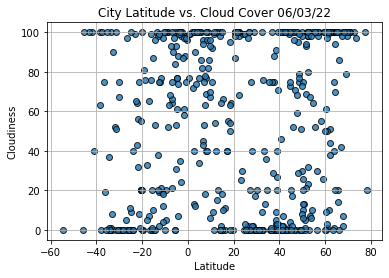

In [32]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloud Cover "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

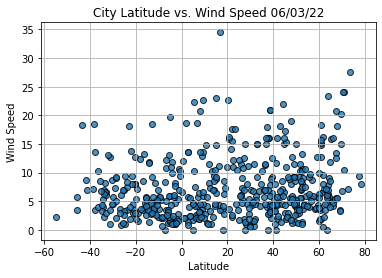

In [33]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()